# 4장. 데이터 표현과 특성 공학

In [37]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
    # !pip install -q --upgrade scikit-learn
    # # mglearn을 다운받고 압축을 풉니다.
    # !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    # !tar -xzf mglearn.tar.gz
    # !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
    # !tar -xzf data.tar.gz
    # # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()

In [38]:
import sklearn
import matplotlib
import pandas as pd
import mglearn

In [39]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


문자열로 된 범주형 데이터 확인하기

In [40]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [41]:
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [42]:
data_dummies.head()  # 연속형 특성인 age와 hours-per-week는 그대로지만 범주형 특성은 값마다 새로운 특성들로 확장되었음

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [43]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']   # age 부터 occupation-transport-moving까지를 추출한다음 -> 이를 x
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


### 4.1.2 숫자로 표현된 범주형 특성(get dummies)

In [45]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듭니다
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                        '범주형 특성': ['양말', '여우', '양말', '상자']})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [46]:
# get dummies 를 이용하면 문자열 특성만 인코딩되며 숫자 특성은 바뀌지 않는다. 
# 즉, 범주형 문자열을 숫자화 시키고 싶을때 더미변수화!

In [47]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [48]:
# 숫자 특성까지 더미화 하고싶다면 이렇게

In [49]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


### 4.2 OneHotEncoder와 ColumnTransformer: scikit-learn으로 범주형 변수 다루기

In [50]:
from sklearn.preprocessing import OneHotEncoder
# sparse=False로 설정하면 OneHotEncode가 희소 행렬이 아니라 넘파이 배열을 반환한다.
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


- 희소행렬 : 행렬의 값이 대부분 0 인 경우를 가르키는 표현 -> 엄청난 크기의 희소행렬이면 메모리 낭비가 심해진다!
- 넘파이 배열 : 빠르고 유연한 자료형이다. 수학식에서 행렬 연산과 비슷한 연산을 할 수 있다.

In [51]:
print(ohe.get_feature_names_out())

['숫자 특성_0' '숫자 특성_1' '숫자 특성_2' '범주형 특성_상자' '범주형 특성_양말' '범주형 특성_여우']


In [52]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), 
      ['workclass', 'education', 'gender', 'occupation'])])

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출합니다
data_features = data.drop("income", axis=1)
# 데이터프레임과 incom을 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [55]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


In [56]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

### 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델
데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다르다.  
아주 폭 넓게 사용하는 두 알고리즘인 선형모델과 트리기반모델(결정트리, 그래디언트 부스팅트리, 랜덤포레스트 등)은 영향이 매우 다르다.

In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # winodows
matplotlib.rcParams['font.size'] = 15  # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상 방지!


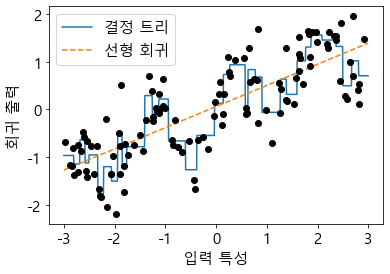

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show()



In [60]:
bins=np.linspace(-3,3,11)
print("구간 : {}".format(bins))

구간 : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [61]:
which_bin = np.digitize(X, bins=bins)
print("데이터 포인트 :\n", X[:5])
print("데이터 포인트 소속구간 : \n", which_bin[:5])

데이터 포인트 :
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
데이터 포인트 소속구간 : 
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


- 이렇게 함으로써 wave 데이터셋에 있는 연속형 특성을 각 데이터 포인트가 어느 구간에 속했는지로 인코딩한 범주형 특성으로 변환하였다.

In [62]:
from sklearn.preprocessing import OneHotEncoder
# sparse=False로 설정하면 OneHotEncode가 희소 행렬이 아니라 넘파이 배열을 반환한다.
ohe = OneHotEncoder(sparse=False)
ohe.fit(which_bin)

OneHotEncoder(sparse=False)

In [63]:
X_binned = ohe.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [64]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (120, 10)


### 4.5 상호작용과 다항식
특성을 풍부하게 나타내는 도 하나의 방법은 원본 데이터에 상호작용과 다항식을 추가하는 것!  

통계적 모델링 뿐만 아니라 일반적인 머신러닝 어플리케이션에도 많이 적용된다.

In [65]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


위 모델은 각 구간의 절편과 기울기를 학습했다. wave 데이터셋의 각 구간에 대해 상숫값을 학습해서 한차원 더 넣었기때문에 11차원 데이터 셋이 만들어짐.  


In [66]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


각 구간에 다른 기울기를 가지게끔 x축 사이에 상호작용 특성을 추가한다.  
이 특성이 구간 특성과 원본 특성의 곱이다.  


In [67]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음

NameError: name 'line_binned' is not defined

In [68]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10까지 고차항을 추가합니다
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가합니다
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [69]:
print("X_poly.shape:", X_poly.shape) # 10 차원을 사용했으므로 10개의 특성이 만들어진다.

X_poly.shape: (120, 10)


In [70]:
print("X 원소:\n", X[:5])
print("X_poly 원소:\n", X_poly[:5])   # X와 X_poly의 값을 비교

X 원소:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [71]:
print("항 이름:\n", poly.get_feature_names_out())

항 이름:
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


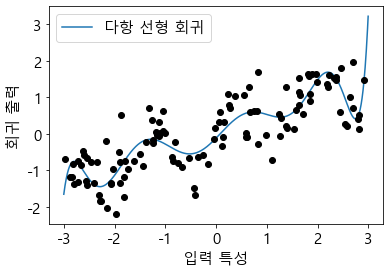

In [72]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음 

- 위처럼 다항식 특성을 선형 모델과 함께 사용하면 전형적인 다항 회귀(polynomial regression) 모델이 된다! 

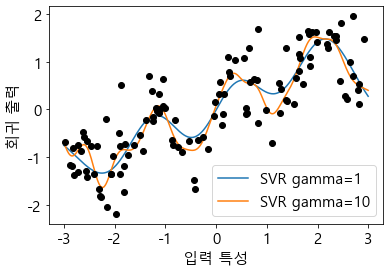

In [73]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음

- 보스턴 주택 가격 데이터셋을 이용해서 상호작용과 다항식을 위한 더 현실적인 애플리케이션을 본다

In [74]:

# 경고 메시지를 피하기 위해 다음 코드를 추가합니다.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)  # 차수를 2차로 하여 다항식 특성을 뽑는다,

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [76]:
print("다항 특성 이름:\n", poly.get_feature_names_out())

다항 특성 이름:
 ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


In [77]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


- 특성을 추가하지 않아도 랜덤 포레스트는 Ridge의 성능과 맞먹는다. 오히려 상호작용과 다항식을 추가하면 성능이 조금 줄어든다

### 4.6 일변량 비선형 변환
앞에서 제곱항이나 세제곱항을 추가하면 선형 회귀 모델이 도움이 됨을 보았다. 한편 log, exp, sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용하다!
특히 log와 exp 함수는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는데 도움을 준다.

In [79]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [80]:
print("특성 출현 횟수:\n", np.bincount(X[:, 0]))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


<function matplotlib.pyplot.show(close=None, block=None)>

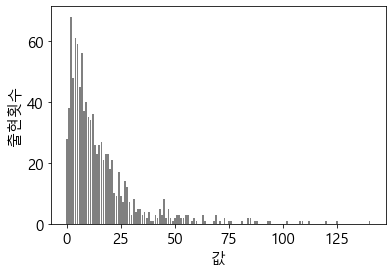

In [82]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현횟수")
plt.xlabel("값")
plt.show

- 이 데이터에 릿지회귀를 적용해본다.
- cf. 릿지회귀 : 기존의 다중 선형 회귀선을 팽팽한 고무줄이라고 한다면 릿지는 이 고무줄을 느슨하게 만들어준것.
  람다가 0 이라면 다중선형회귀와 같은데,  
  반대로 람다가 커지면 커질수록 다중회귀선의 기울기를 떨어뜨려 0 으로 수렴하게 만든다.

In [83]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


비교적 낮은 점수로 x와 y의 관계를 제대로 모델링 하지 못했다.  
그렇기에 로그함수를 적용할것이며, 데이터에 0 이 있다면 log0은 정의가 안되므로, log(X+1)을 사용할것이다.

In [84]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

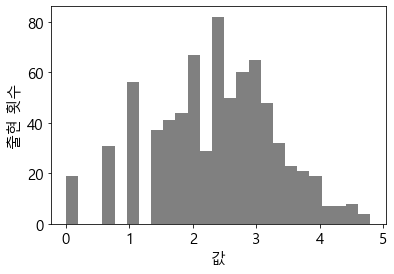

In [85]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")
plt.show() # 책에는 없음

위 데이터에 릿지 모델을 만들면 아래처럼 훨씬 좋은 결과가 나온다.

In [87]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.875


이러한 변환은 트리기반 모델에서는 불필요하지만 선형 모델에서는 필수이다!!   
가끔 회귀에서 타깃변수 y를 변환하는 것도 좋을 때도 있다. ex) 카운트(주문횟수)를 예측하는 경우가 전형적인 log(y+1)을 사용하면 큰 도움이 됨!
 
 지금까지 구간분할, 다항식, 상호작용은 데이터가 주어진 상황에서 모델의 성능에 큰 영향을 줄 수 있었다.
 특별히 선형모델이나 나이브베이즈 모델 같은 덜 복잡한 모델일 경우에!

  반면에 트리기반 모델은 스스로 중요한 상호작용을 찾아낼 수 있고 대부분의 경우 데이터를 명시적으로 변환하지 않아도 된다.
   SVM, 최근접이웃, 신경망 같은 모델은 이따금 구간분할, 상호작용, 다항식으로 이득을 볼 순 있지만 선형 모델보다는 영향이 그렇게 뚜렷하진 않다.

## 4.5 특성 자동 선택
일변량 통계, 모델 기반 선택, 반복적 선택  
위 방법들은 모두 지도학습 방법이므로 최적값을 찾으려면 타깃값이 필요함.

### 4.5.1 일변량 통계
 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지를 계산함. 분류에서는 분산분석이라고도 함.  
 너무 많은 특성때문에 모델을 만들기가 현실적으로 어려울때, 너무 많은 특성들이 확실히 도움이 안 된다고 생각할때 사용하자

In [89]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생시킵니다
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가합니다
# 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용합니다
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


- 특성 개수가 80개에서 40개로 줌. 

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


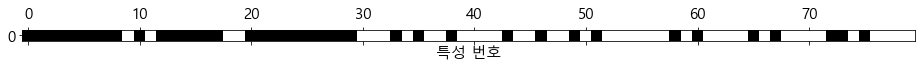

In [90]:
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show() # 책에는 없음

In [92]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)  # fit 할때는 train으로,
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))   # 점수 볼때는 test로!
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
        lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.947
선택된 일부 특성을 사용한 점수: 0.933


### 4.5.2 모델 기반 특성 선택
지도학습 머신러닝 모델을 사용하여 특성의 중요도를 평가하여 가장 중요한 특성들만 선택함,  
결정 트리와 이를 기반으로 한 모델은 각 특성의 중요도가 담겨있는 feature_importances_속성을 제공  
일변량 분석과는 반대로 모델 기반 특성 선택은 한번에 모든 특성을 고려하므로 상호작용 부분을 반영할 수 있으며,  
특성 선택은 SelectFromModel에 구현되어 있다.

In [94]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42), # 트리 100개로 만든 랜덤 포레스트 분류, 절반 가량의 특성이 선택될 수 있도록 median!
    threshold="median")

In [96]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


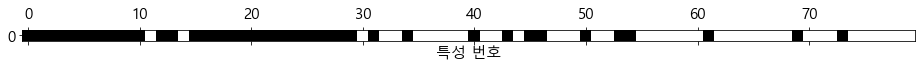

In [97]:
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show() # 책에는 없음

- 위는  RandomForestClassifier를 사용한  SelectFromModel 이 선택한 특성

In [98]:

X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.947


의사 결정 트리와 랜덤 포레스트의 차이점  
랜덤 포레스트는 의사 결정 트리의 그룹입니다. 그러나 양자 사이에는 몇 가지 차이점이 있습니다. 의사 결정 트리는 의사 결정에 사용하는 규칙을 만드는 경향이 있습니다.  
랜덤 포레스트는 기능을 무작위로 선택하고 관찰하여 의사 결정 트리의 포리스트를 만든 다음 결과를 평균화합니다.  

이론에 따르면 많은 수의 상관되지 않은 트리가 하나의 개별 의사 결정 트리보다 더 정확한 예측을 생성합니다. 이는 많은 트리들이 함께 작동하여 개별 오류와 과적합으로부터 서로를 보호하기 때문입니다.  

랜덤 포레스트가 제대로 작동하려면 다음 세 가지가 필요합니다.  

모델이 추측만 하지 않도록 신호가 식별가능해야 합니다.  
트리로 만든 예측은 다른 트리들과 상관 관계가 작아야 합니다.  
어느 정도 예측력이 있는 기능에 대해 GI=GO여야 합니다.  

### 4.7.3 반복적 특성 선택
재귀적 특성 제거 : 모든 특성을 갖고 시작해서 어떤 종료 조건이 될때까지 특성을 하나씩 제거해나가는 방법

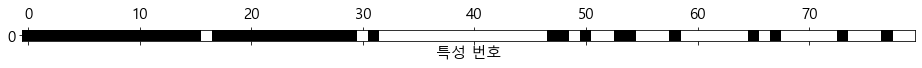

In [99]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# 선택된 특성을 표시합니다
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show() # 책에는 없음

In [100]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.940


In [101]:
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))


테스트 점수: 0.951


### 4.8 전문가 지식 활용

In [103]:
citibike = mglearn.datasets.load_citibike()

In [104]:
print("시티 바이크 데이터:\n", citibike.head())

시티 바이크 데이터:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


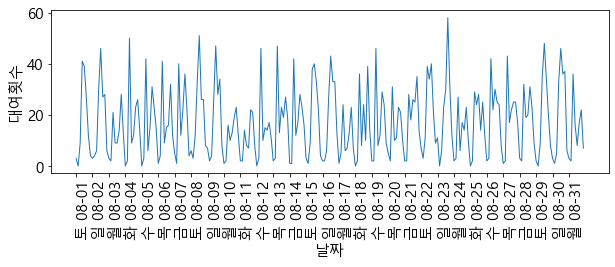

In [106]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
week = ["일", "월", "화","수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), 
                                              xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")
plt.show() 

In [108]:
#타깃값 추출 (대여 횟수)
y = citibike.values
# 판다스 1.3.0에서 datetime을 astype()으로 정수로 바꾸는 것이 deprecated되었고 향후 삭제될 예정입니다.
# 대신 view()를 사용합니다.
# POSIX 시간을 10**9로 나누어 변경
X = citibike.index.view("int64").reshape(-1, 1) // 10**9

In [109]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용합니다
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만듭니다
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눕니다
    X_train, X_test = features[:n_train], features[n_train:]
    # 타깃값도 나눕니다
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="테스트 예측")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")
    

테스트 세트 R^2: -0.04


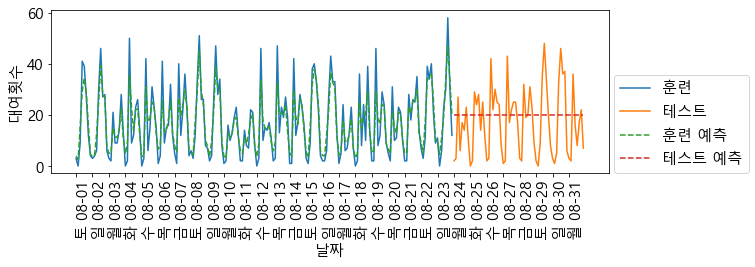

In [110]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

테스트 세트 R^2: 0.60


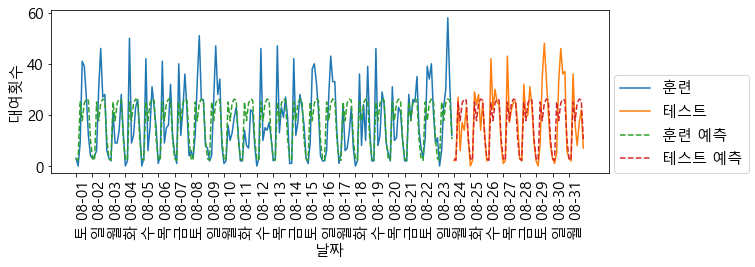

In [111]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

테스트 세트 R^2: 0.84


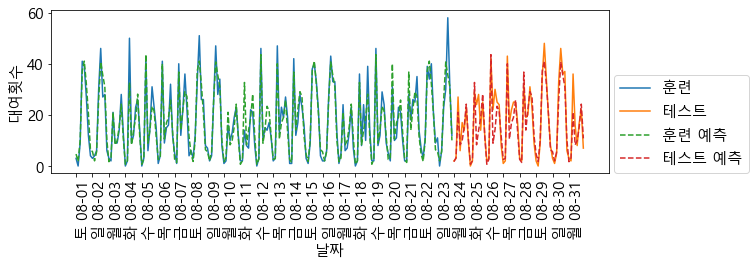

In [112]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2: 0.13


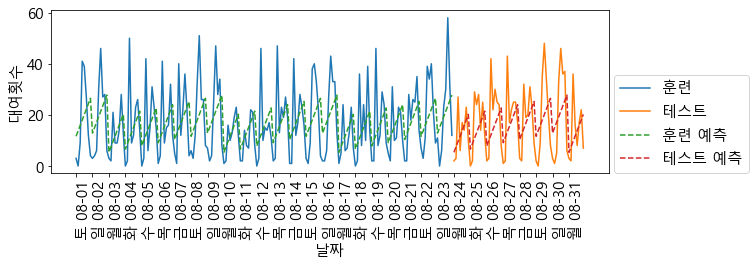

In [113]:

from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())


- 위는 LinearRegression 성능을 사용하였는데, 성능이 훨씬 나쁘고 주기적인 패턴도 이상하다. 그 이유는 요일과 시간이 정수로 인코딩되어 있어서 연속형 변수로 해석되기 때문
- 따라서 OnehotEncoder를 사용하여 정수형을 범주형 변수로 해석해야한다.

In [114]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

테스트 세트 R^2: 0.62


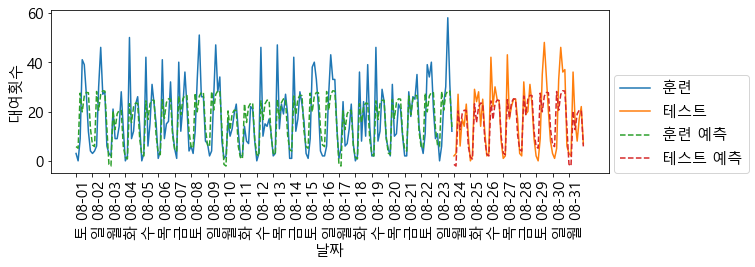

In [115]:
eval_on_features(X_hour_week_onehot, y, Ridge())

- 훨씬 좋아졌다. 모든 요일에 대하여 하나의 계수를 학습하고, 시간에 대해서도 하나의 계수를 학습한다. 즉 모든날에 걸쳐 공유된다는 뜻!

테스트 세트 R^2: 0.85


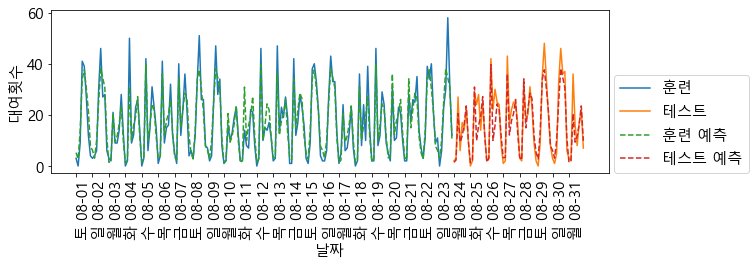

In [116]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

- 이런 특성 변환을 통해 모델의 성능이 랜덤 포레스트와 거의 비슷해짐. 이러한 모델의 가장 큰 장점은 무엇이 학습되었는지가 명확하다는것

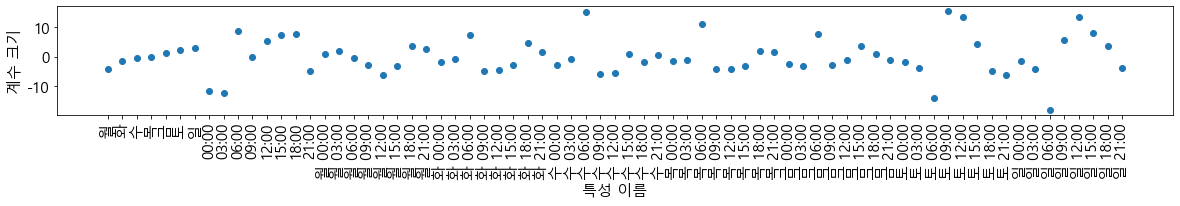

In [119]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]
plt.figure(figsize=(20, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")
plt.show() 